<a href="https://colab.research.google.com/github/rafabandoni/world-cup-22-predict/blob/main/predict_worldcup22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
# Historical results dataset
historical_results = pd.read_csv('https://raw.githubusercontent.com/rafabandoni/world-cup-22-predict/main/data/historical-results.csv')
historical_results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [3]:
# Historical win loose draw ratio
historical_win_loose_draw_ratios = pd.read_csv('https://raw.githubusercontent.com/rafabandoni/world-cup-22-predict/main/data/historical_win-loose-draw_ratios.csv')
historical_win_loose_draw_ratios.head(5)

,country1,country2,games,wins,looses,draws
0,Argentina,Australia,7,0.714286,0.142857,0.142857
1,Australia,Argentina,7,0.142857,0.714286,0.142857
2,Argentina,Belgium,4,0.750000,0.250000,0.000000
3,Belgium,Argentina,4,0.250000,0.750000,0.000000
4,Argentina,Brazil,108,0.361111,0.398148,0.240741


In [4]:
# Fifa ranking
ranking = pd.read_csv('https://raw.githubusercontent.com/rafabandoni/world-cup-22-predict/main/data/ranking.csv')
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


In [5]:
# Game results
results = pd.read_csv('https://raw.githubusercontent.com/rafabandoni/world-cup-22-predict/main/data/shootouts.csv')
results.head(5)

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-04-21,Senegal,Ghana,Ghana


In [6]:
# Matches schedule
matches_schedule = pd.read_csv('https://raw.githubusercontent.com/rafabandoni/world-cup-22-predict/refs/heads/main/data/matches-schedule.csv')
matches_schedule.head(5)

,match,date,country1,country2,phase
0,1,21/11/2022,Qatar,Ecuador,group matches
1,2,21/11/2022,Senegal,Netherlands,group matches
2,3,21/11/2022,England,Iran,group matches
3,4,21/11/2022,USA,Wales,group matches
4,5,22/11/2022,France,Australia,group matches


# EDA

## Historical results

In [11]:
historical_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


### Null values

In [8]:
historical_results.isna().any()

,0
date,False
home_team,False
away_team,False
home_score,True
away_score,True
tournament,False
city,False
country,False
neutral,False


In [9]:
# Checking null data
historical_results.loc[
    (historical_results['home_score'].isna()) |
    (historical_results['away_score'].isna())]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44059,2022-09-30,Fiji,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Luganville,Vanuatu,True


Only one row with null value, with teams that are not very important for our World Cup prediction. We will just drop it.

In [10]:
historical_results = historical_results.dropna()

### Analysis

In [14]:
historical_results.dtypes

,0
date,object
home_team,object
away_team,object
home_score,float64
away_score,float64
tournament,object
city,object
country,object
neutral,bool


In [16]:
# Change date for datetime
historical_results['date'] = historical_results['date'].astype('datetime64[ns]')

In [20]:
historical_results.describe()

,date,home_score,away_score
count,44059,44059.000000,44059.000000
mean,1992-04-27 00:40:49.297532800,1.740507,1.178306
min,1872-11-30 00:00:00,0.000000,0.000000
25%,1979-03-23 12:00:00,1.000000,0.000000
50%,1998-12-16 00:00:00,1.000000,1.000000
75%,2010-12-27 12:00:00,2.000000,2.000000
max,2022-09-27 00:00:00,31.000000,21.000000
std,NaN,1.747525,1.394815


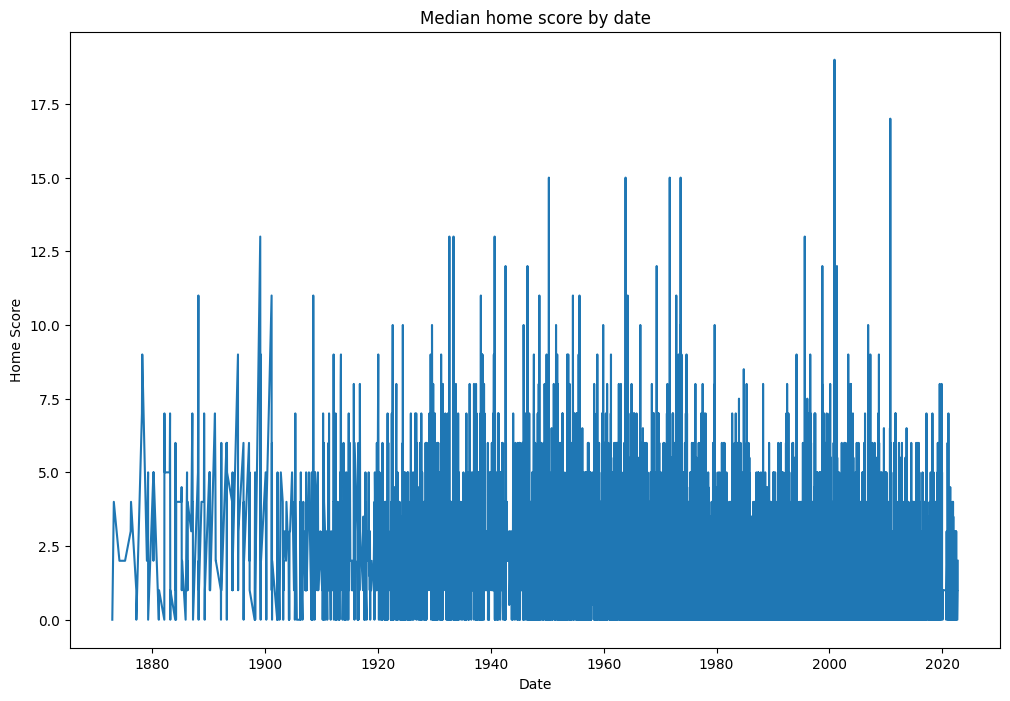

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(data=historical_results.groupby('date', as_index=False).median(numeric_only=True),
             y='home_score',
             x='date')
plt.title('Median home score by date')
plt.ylabel('Home Score')
plt.xlabel('Date')
plt.show()